In [161]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

In [162]:
graffiti = pd.read_csv('/Users/emmapeterson/Downloads/311_Service_Requests_-_Graffiti_Removal.csv')

In [163]:
potholes = pd.read_csv('/Users/emmapeterson/Downloads/311_Service_Requests_-_Pot_Holes_Reported.csv')

In [164]:
sanitation = pd.read_csv('/Users/emmapeterson/Downloads/311_Service_Requests_-_Sanitation_Code_Complaints.csv')

In [165]:
vacant_abandoned = pd.read_csv\
('/Users/emmapeterson/Downloads/311_Service_Requests_-_Vacant_and_Abandoned_Buildings_Reported.csv', low_memory=False)

In [166]:
#graffiti: number of requests total and by ward
requests, rows = graffiti.shape
print("Number of requests:", requests)
counts = graffiti.groupby('Ward').size()
counts.sort_values(axis=0, ascending=False, inplace=True)
print(counts)

Number of requests: 855865
Ward
14.0    64934
1.0     49080
25.0    48709
12.0    47891
35.0    38698
33.0    36707
22.0    35736
11.0    34359
47.0    32010
23.0    30808
31.0    29631
32.0    28530
30.0    27716
26.0    21463
27.0    20227
10.0    18804
13.0    18469
42.0    17214
40.0    16536
16.0    15960
39.0    15070
38.0    14639
2.0     14494
15.0    14016
44.0    13875
50.0    13302
45.0    12760
43.0    12150
28.0    11973
49.0    11172
36.0     9546
48.0     9456
18.0     8955
46.0     8780
29.0     8253
37.0     7304
24.0     6880
20.0     5693
3.0      4016
17.0     2908
4.0      2341
7.0      2187
5.0      2073
9.0      1910
41.0     1856
8.0      1625
19.0     1436
34.0     1171
6.0      1099
21.0     1054
0.0       271
dtype: int64


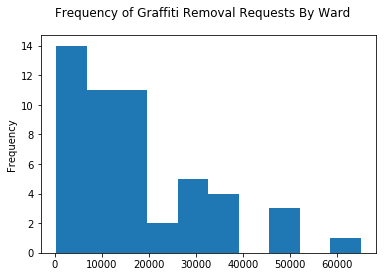

In [167]:
#graffiti: frequency by ward
fig = plt.figure()
fig.suptitle("Frequency of Graffiti Removal Requests By Ward")
counts.plot.hist()
plt.show()

In [168]:
#graffiti: subtypes
types = graffiti.groupby('What Type of Surface is the Graffiti on?').size()
types.sort_values(axis=0, ascending=False, inplace=True)
print(types)


What Type of Surface is the Graffiti on?
Brick - Unpainted                       198721
Brick - Painted                         166057
Metal - Painted                         142213
Other / Unknown Surface                  87059
Cement (Sidewalk, Alley, Wall, Curb)     50482
Wood - Painted                           48044
Metal                                    47903
Aluminum Siding                          42906
Metal - Unpainted                        15745
Vinyl Siding                             14403
Glass                                    12147
Wood - Unpainted                         10800
Other/Unknown Surface                     6568
Limestone                                 3150
Stucco                                    2837
Marble/Granite                            1056
Tree                                       727
Asphalt                                    691
dtype: int64


In [169]:
#reports over time
cutoff_one = datetime(2007, 1, 1)
cutoff_two = datetime(2008, 1, 1)
cutoff_three = datetime(2009, 1, 1)
cutoff_four = datetime(2010, 1, 1)
cutoff_five = datetime(2011, 1, 1)
cutoff_six = datetime(2012, 1, 1)
cutoff_seven = datetime(2013, 1, 1)
cutoff_eight = datetime(2014, 1, 1)
cutoff_nine = datetime(2015, 1, 1)
cutoff_ten = datetime(2016, 1, 1)
cutoff_eleven = datetime(2017, 1, 1)

year_2007 = 0
year_2008 = 0
year_2009 = 0
year_2010 = 0
year_2011 = 0
year_2012 = 0
year_2013 = 0
year_2014 = 0
year_2015 = 0
year_2016 = 0
year_2017 = 0

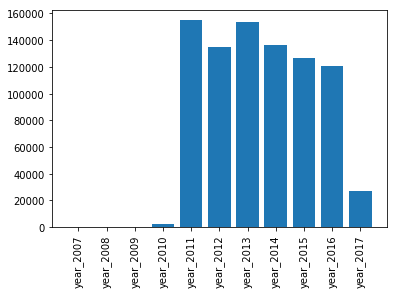

In [170]:
#graffiti: response time
graffiti["Response Time"] = ""
cutoff = datetime(2000, 1, 1) #to exclude entries from before 311 was implemented

for index, row in graffiti.iterrows():
    start = graffiti.ix[index, 'Creation Date']
    end = graffiti.ix[index, 'Completion Date']
    
    if type(end) == str:
        a = datetime.strptime(start, "%m/%d/%Y")
        b = datetime.strptime(end, "%m/%d/%Y")
                    
        if a > cutoff:
            delta = b - a
            graffiti.set_value(index, 'Response Time', delta.days)
            
            if a > cutoff_one and a < cutoff_two:
                year_2007 += 1
        
            elif a > cutoff_two and a < cutoff_three:
                year_2008 += 1

            elif a > cutoff_three and a < cutoff_four:
                year_2009 += 1

            elif a > cutoff_four and a < cutoff_five:
                year_2010 += 1

            elif a > cutoff_five and a < cutoff_six:
                year_2011 += 1

            elif a > cutoff_six and a < cutoff_seven:
                year_2012 += 1

            elif a > cutoff_seven and a < cutoff_eight:
                year_2013 += 1

            elif a > cutoff_eight and a < cutoff_nine:
                year_2014 += 1
            
            elif a > cutoff_nine and a < cutoff_ten:
                year_2015 += 1

            elif a > cutoff_ten and a < cutoff_eleven:
                year_2016 += 1

            elif a > cutoff_eleven:
                year_2017 += 1
            
        else: 
            graffiti.set_value(index, 'Response Time', np.nan)
    else:
        graffiti.set_value(index, 'Response Time', np.nan)

response_frame = graffiti.sort_values(['Response Time'], ascending=[False])

x_labels = ['year_2007', 'year_2008', 'year_2009', 'year_2010', 'year_2011',\
'year_2012', 'year_2013', 'year_2014', 'year_2015', 'year_2016', 'year_2017']

bars = [year_2007, year_2008, year_2009, year_2010, year_2011,\
year_2012, year_2013, year_2014, year_2015, year_2016, year_2017]

plt.bar(range(11), bars, align='center')
plt.xticks(range(11), x_labels, rotation='vertical')
plt.show()


In [171]:
#longest response times
longest = response_frame.loc[response_frame['Response Time'] > 365]
print('number of requests taking longer than one year to complete:', len(longest))
print()

longest_by_ward = longest.groupby('Ward').size()
longest_by_ward.sort_values(axis=0, ascending=False, inplace=True)

print(longest_by_ward)
#most common: 35, 12, 32

number of requests taking longer than one year to complete: 586

Ward
35.0    87
12.0    85
32.0    48
30.0    47
49.0    46
31.0    28
25.0    23
14.0    19
29.0    18
1.0     18
22.0    17
38.0    15
47.0    15
36.0    14
43.0    14
26.0    13
28.0     9
48.0     8
10.0     7
24.0     7
27.0     6
16.0     6
50.0     6
46.0     5
33.0     4
15.0     3
40.0     3
2.0      3
37.0     2
23.0     2
42.0     2
11.0     2
45.0     1
20.0     1
13.0     1
39.0     1
dtype: int64


In [172]:
#fastest response times
fastest = response_frame.loc[response_frame['Response Time'] < 30]
print('Number of requests taking fewer than 30 days to complete:', len(fastest))
print()

fastest_by_ward = fastest.groupby('Ward').size()
fastest_by_ward.sort_values(axis=0, ascending=False, inplace=True)
print(fastest_by_ward)

Number of requests taking fewer than 30 days to complete: 831412

Ward
14.0    63676
12.0    47278
1.0     47246
25.0    47040
35.0    37070
33.0    35956
22.0    34206
11.0    33568
47.0    31234
23.0    30457
31.0    29072
32.0    26930
30.0    26805
26.0    20829
27.0    19390
10.0    18392
13.0    18307
42.0    17077
40.0    16027
16.0    15484
39.0    14617
2.0     14335
38.0    13998
15.0    13656
44.0    13483
50.0    12805
45.0    12333
43.0    11583
28.0    11496
49.0    10568
36.0     9337
48.0     9024
18.0     8866
46.0     8534
29.0     8066
37.0     6951
24.0     6721
20.0     5558
3.0      3936
17.0     2843
4.0      2284
7.0      2121
5.0      2016
9.0      1860
41.0     1824
8.0      1576
19.0     1427
34.0     1137
6.0      1057
21.0     1008
0.0       242
dtype: int64


In [173]:
#pot holes: number of requests total and by ward
requests, rows = potholes.shape
print("Number of requests:", requests)
counts = potholes.groupby('Ward').size()
counts.sort_values(axis=0, ascending=False, inplace=True)
print(counts)

Number of requests: 458652
Ward
41.0    16623
32.0    14171
23.0    14129
19.0    13537
45.0    13213
13.0    12746
8.0     12497
21.0    11883
39.0    11858
42.0    11742
2.0     11720
36.0    11654
34.0    11305
18.0    11038
50.0    10858
27.0    10435
38.0    10240
10.0     9877
14.0     9824
40.0     9701
29.0     9681
6.0      9621
28.0     8692
35.0     8655
1.0      8633
49.0     8452
5.0      8426
9.0      8421
11.0     8360
25.0     8297
12.0     7892
24.0     7665
47.0     7658
37.0     7581
31.0     7503
17.0     7441
30.0     6929
26.0     6870
43.0     6859
7.0      6697
3.0      6500
33.0     6478
16.0     6379
15.0     6278
20.0     6241
48.0     5752
4.0      5693
22.0     5504
44.0     5392
46.0     3485
0.0      1312
dtype: int64


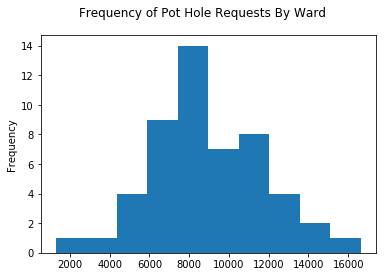

In [174]:
#potholes: frequency by ward
fig = plt.figure()
fig.suptitle("Frequency of Pot Hole Requests By Ward")
counts.plot.hist()
plt.show()

In [176]:
#potholes: subtypes
types = potholes.groupby('MOST RECENT ACTION').size()
types.sort_values(axis=0, ascending=False, inplace=True)
print(types)

MOST RECENT ACTION
Pothole Patched                                                            263027
No Potholes Found                                                           21581
Completed Upon Arrival                                                      12428
 No Problem Found                                                            5919
Complete Upon Arrival                                                        5357
Street Resurfaced                                                            4095
CDOT Pavement Cave-In Survey Transfer Outcome                                3939
WM Sewer Cave In Inspection Transfer Outcome                                 2572
CDOT Alley Pot Hole Transfer Outcome                                         1657
Completed                                                                    1030
CDOT Street Cut Complaints Transfer Outcome                                   971
CDOT Inspect Public Way Survey Transfer Outcome                               6

In [177]:
#initialize time periods

year_2007 = 0
year_2008 = 0
year_2009 = 0
year_2010 = 0
year_2011 = 0
year_2012 = 0
year_2013 = 0
year_2014 = 0
year_2015 = 0
year_2016 = 0
year_2017 = 0

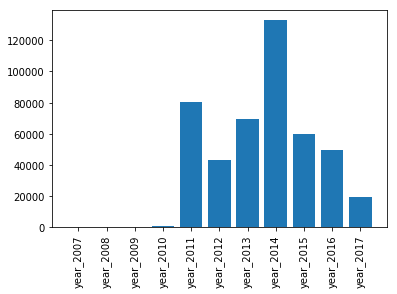

In [178]:
#potholes: response time
potholes["Response Time"] = ""
cutoff = datetime(2000, 1, 1) #to exclude entries from before 311 was implemented

for index, row in potholes.iterrows():
    start = potholes.ix[index, 'CREATION DATE']
    end = potholes.ix[index, 'COMPLETION DATE']
    
    if type(end) == str:
        a = datetime.strptime(start, "%m/%d/%Y")
        b = datetime.strptime(end, "%m/%d/%Y")
        
        if a > cutoff_one and a < cutoff_two:
                year_2007 += 1
        
        elif a > cutoff_two and a < cutoff_three:
            year_2008 += 1

        elif a > cutoff_three and a < cutoff_four:
            year_2009 += 1

        elif a > cutoff_four and a < cutoff_five:
            year_2010 += 1

        elif a > cutoff_five and a < cutoff_six:
            year_2011 += 1

        elif a > cutoff_six and a < cutoff_seven:
            year_2012 += 1

        elif a > cutoff_seven and a < cutoff_eight:
            year_2013 += 1

        elif a > cutoff_eight and a < cutoff_nine:
            year_2014 += 1
            
        elif a > cutoff_nine and a < cutoff_ten:
            year_2015 += 1

        elif a > cutoff_ten and a < cutoff_eleven:
            year_2016 += 1

        elif a > cutoff_eleven:
            year_2017 += 1
        
        if a > cutoff:
            delta = b - a
            potholes.set_value(index, 'Response Time', delta.days)
        else: 
            potholes.set_value(index, 'Response Time', np.nan)
    else:
        potholes.set_value(index, 'Response Time', np.nan)

test = potholes.sort_values(['Response Time'], ascending=[False])

x_labels = ['year_2007', 'year_2008', 'year_2009', 'year_2010', 'year_2011',\
'year_2012', 'year_2013', 'year_2014', 'year_2015', 'year_2016', 'year_2017']

bars = [year_2007, year_2008, year_2009, year_2010, year_2011,\
year_2012, year_2013, year_2014, year_2015, year_2016, year_2017]

plt.bar(range(11), bars, align='center')
plt.xticks(range(11), x_labels, rotation='vertical')
plt.show()

In [179]:
#longest response times
longest = test.loc[test['Response Time'] > 365] #longer than one year
print('number of requests taking longer than one year to complete:', len(longest))
print()

longest_by_ward = longest.groupby('Ward').size()
longest_by_ward.sort_values(axis=0, ascending=False, inplace=True)

print(longest_by_ward)
#most common: 32, 1, 2

number of requests taking longer than one year to complete: 4794

Ward
32.0    435
1.0     184
2.0     169
35.0    168
37.0    158
25.0    155
8.0     153
18.0    153
21.0    153
41.0    150
28.0    148
43.0    136
39.0    133
36.0    131
24.0    126
22.0    124
29.0    123
50.0    123
5.0     121
6.0     117
27.0    111
26.0    110
40.0    110
42.0    108
31.0    100
33.0     96
30.0     96
45.0     82
48.0     73
10.0     71
7.0      68
19.0     60
38.0     52
23.0     49
0.0      48
49.0     45
47.0     43
17.0     41
13.0     37
44.0     34
9.0      28
12.0     25
14.0     24
34.0     22
3.0      21
16.0     21
15.0     16
46.0     15
20.0     13
4.0       9
11.0      6
dtype: int64


In [180]:
#fastest response times
fastest = test.loc[test['Response Time'] < 30]
print('Number of requests taking fewer than 30 days to complete:', len(fastest))
print()

fastest_by_ward = fastest.groupby('Ward').size()
fastest_by_ward.sort_values(axis=0, ascending=False, inplace=True)
print(fastest_by_ward)
#most common: 42, 19, 23

Number of requests taking fewer than 30 days to complete: 342154

Ward
41.0    11289
19.0    11282
23.0    11110
13.0    10804
42.0    10164
32.0    10056
8.0      9701
21.0     9383
34.0     9372
45.0     9051
2.0      8871
18.0     8654
10.0     8092
14.0     8081
6.0      7621
39.0     7561
27.0     7529
50.0     7497
36.0     7402
11.0     7200
38.0     7190
29.0     7141
5.0      6781
9.0      6738
12.0     6508
40.0     6267
25.0     6224
49.0     6219
1.0      6011
17.0     5930
28.0     5854
35.0     5697
3.0      5478
31.0     5360
47.0     5352
16.0     5259
7.0      5251
43.0     5211
24.0     5086
15.0     5070
26.0     4878
20.0     4730
37.0     4698
4.0      4462
30.0     4379
44.0     4303
33.0     4299
48.0     4057
22.0     3563
46.0     2445
0.0       884
dtype: int64


In [181]:
#sanitation: number of requests total and by ward
requests, rows = sanitation.shape
print("Number of requests:", requests)
counts = sanitation.groupby('Ward').size()
counts.sort_values(axis=0, ascending=False, inplace=True)
print(counts)

Number of requests: 119011
Ward
6.0     4844
21.0    4688
32.0    4451
17.0    3972
7.0     3941
18.0    3653
28.0    3649
34.0    3238
43.0    3153
27.0    3149
9.0     3144
24.0    3025
8.0     3017
35.0    2931
26.0    2797
37.0    2723
15.0    2716
20.0    2685
14.0    2685
1.0     2640
11.0    2564
16.0    2535
33.0    2207
31.0    2100
50.0    2042
39.0    2041
29.0    2018
30.0    1983
45.0    1981
2.0     1964
25.0    1890
23.0    1887
3.0     1883
36.0    1810
38.0    1787
40.0    1782
10.0    1644
13.0    1629
47.0    1610
5.0     1606
44.0    1555
46.0    1519
41.0    1475
22.0    1457
19.0    1357
12.0    1353
49.0    1257
42.0    1080
4.0     1048
48.0     838
0.0        3
dtype: int64


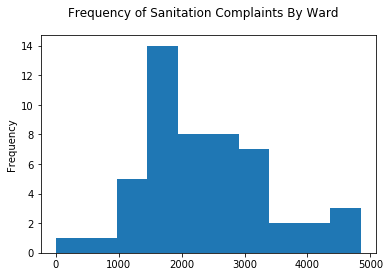

In [182]:
#sanitation complaints: frequency by ward
fig = plt.figure()
fig.suptitle("Frequency of Sanitation Complaints By Ward")
counts.plot.hist()
plt.show()

In [183]:
#sanitation: subtypes
types = sanitation.groupby('What is the Nature of this Code Violation?').size()
types.sort_values(axis=0, ascending=False, inplace=True)
print(types)

What is the Nature of this Code Violation?
Other                                         44620
Garbage in yard                               21579
Garbage in alley                              18053
Dumpster not being emptied                     9231
Overflowing carts                              8946
Dog feces in yard                              6366
Construction Site Cleanliness/Fence            4194
Standing water                                 1158
Graffiti Commercial Vehicle                      88
WHAT IS THE NATURE OF THIS CODE VIOLATION?        1
dtype: int64


In [184]:
#initialize time periods

year_2007 = 0
year_2008 = 0
year_2009 = 0
year_2010 = 0
year_2011 = 0
year_2012 = 0
year_2013 = 0
year_2014 = 0
year_2015 = 0
year_2016 = 0
year_2017 = 0

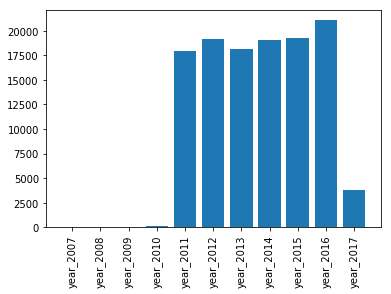

In [185]:
#sanitation complaints: response time
potholes["Response Time"] = ""
cutoff = datetime(2000, 1, 1) #to exclude entries from before 311 was implemented

for index, row in sanitation.iterrows():
    start = sanitation.ix[index, 'Creation Date']
    end = sanitation.ix[index, 'Completion Date']
    cutoff = datetime(2000, 1, 1) #to exclude entries from before 311 was implemented
    
    if type(end) == str:
        a = datetime.strptime(start, "%m/%d/%Y")
        b = datetime.strptime(end, "%m/%d/%Y")
        
        if a > cutoff_one and a < cutoff_two:
                year_2007 += 1
        
        elif a > cutoff_two and a < cutoff_three:
            year_2008 += 1

        elif a > cutoff_three and a < cutoff_four:
            year_2009 += 1

        elif a > cutoff_four and a < cutoff_five:
            year_2010 += 1

        elif a > cutoff_five and a < cutoff_six:
            year_2011 += 1

        elif a > cutoff_six and a < cutoff_seven:
            year_2012 += 1

        elif a > cutoff_seven and a < cutoff_eight:
            year_2013 += 1

        elif a > cutoff_eight and a < cutoff_nine:
            year_2014 += 1
            
        elif a > cutoff_nine and a < cutoff_ten:
            year_2015 += 1

        elif a > cutoff_ten and a < cutoff_eleven:
            year_2016 += 1

        elif a > cutoff_eleven:
            year_2017 += 1
        
        if a > cutoff:
            delta = b - a
            sanitation.set_value(index, 'Response Time', delta.days)
            
        else: 
            sanitation.set_value(index, 'Response Time', np.nan)
    else:
        sanitation.set_value(index, 'Response Time', np.nan)

test = sanitation.sort_values(['Response Time'], ascending=[False])

x_labels = ['year_2007', 'year_2008', 'year_2009', 'year_2010', 'year_2011',\
'year_2012', 'year_2013', 'year_2014', 'year_2015', 'year_2016', 'year_2017']

bars = [year_2007, year_2008, year_2009, year_2010, year_2011,\
year_2012, year_2013, year_2014, year_2015, year_2016, year_2017]

plt.bar(range(11), bars, align='center')
plt.xticks(range(11), x_labels, rotation='vertical')
plt.show()

In [186]:
#longest response times
longest = test.loc[test['Response Time'] > 365] #longer than one year
print('number of requests taking longer than one year to complete:', len(longest))
print()

longest_by_ward = longest.groupby('Ward').size()
longest_by_ward.sort_values(axis=0, ascending=False, inplace=True)

print(longest_by_ward)
#most common: 20, 6, 21

number of requests taking longer than one year to complete: 142

Ward
20.0    33
6.0     16
21.0    13
24.0     7
45.0     6
39.0     6
35.0     6
11.0     5
17.0     5
33.0     5
16.0     4
3.0      4
43.0     4
28.0     3
37.0     3
40.0     3
15.0     3
9.0      3
7.0      3
47.0     2
19.0     2
30.0     1
31.0     1
10.0     1
44.0     1
4.0      1
50.0     1
dtype: int64


In [187]:
#fastest response times
fastest = test.loc[test['Response Time'] < 30]
print('Number of requests taking fewer than 30 days to complete:', len(fastest))
print()

fastest_by_ward = fastest.groupby('Ward').size()
fastest_by_ward.sort_values(axis=0, ascending=False, inplace=True)
print(fastest_by_ward)
#most common: 32, 6, 21

Number of requests taking fewer than 30 days to complete: 112295

Ward
32.0    4433
6.0     4369
21.0    3868
7.0     3769
17.0    3360
43.0    3126
18.0    3012
9.0     3002
35.0    2910
28.0    2876
24.0    2836
27.0    2814
26.0    2728
37.0    2689
14.0    2672
34.0    2655
15.0    2587
1.0     2551
8.0     2523
20.0    2488
11.0    2399
16.0    2207
33.0    2187
31.0    2090
50.0    2032
39.0    2022
29.0    1987
30.0    1979
2.0     1955
45.0    1938
25.0    1886
23.0    1884
3.0     1857
36.0    1807
38.0    1780
40.0    1774
13.0    1627
10.0    1616
5.0     1587
47.0    1579
44.0    1528
46.0    1519
41.0    1473
22.0    1456
12.0    1352
19.0    1291
49.0    1251
42.0    1076
4.0     1044
48.0     837
0.0        3
dtype: int64


In [188]:
#vacant/abandoned buildings: number of reports total and by ward
requests, rows = vacant_abandoned.shape
print("Number of requests:", requests)
counts = vacant_abandoned.groupby('Ward').size()
counts.sort_values(axis=0, ascending=False, inplace=True)
print(counts)

Number of requests: 58757
Ward
17.0    4863
34.0    4053
16.0    4047
15.0    3486
28.0    3226
6.0     3126
7.0     2927
24.0    2763
9.0     2741
20.0    2590
21.0    2397
8.0     2349
27.0    1696
37.0    1615
10.0    1615
3.0     1409
18.0    1115
29.0     931
14.0     903
5.0      880
2.0      689
26.0     664
11.0     575
22.0     538
30.0     527
12.0     517
19.0     491
35.0     489
25.0     455
36.0     454
13.0     454
31.0     437
4.0      417
1.0      386
23.0     379
32.0     374
33.0     264
38.0     252
45.0     239
47.0     192
39.0     189
40.0     172
41.0     161
50.0     155
43.0     117
46.0      89
44.0      87
48.0      84
49.0      80
42.0      51
0.0       10
dtype: int64


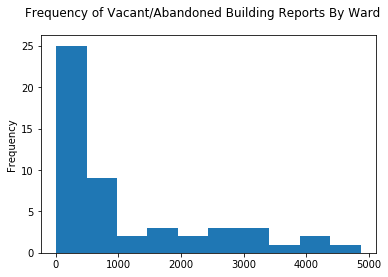

In [189]:
#sanitation complaints: frequency by ward
fig = plt.figure()
fig.suptitle("Frequency of Vacant/Abandoned Building Reports By Ward")
counts.plot.hist()
plt.show()

In [190]:
#vacant/abandoned: subtypes
types = vacant_abandoned.groupby('ANY PEOPLE USING PROPERTY? (HOMELESS, CHILDEN, GANGS)').size()
print(types)

ANY PEOPLE USING PROPERTY? (HOMELESS, CHILDEN, GANGS)
False    26688
True     24413
dtype: int64


In [191]:
#initialize time periods

year_2007 = 0
year_2008 = 0
year_2009 = 0
year_2010 = 0
year_2011 = 0
year_2012 = 0
year_2013 = 0
year_2014 = 0
year_2015 = 0
year_2016 = 0
year_2017 = 0

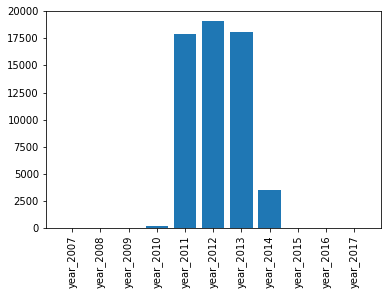

In [192]:
for index, row in vacant_abandoned.iterrows():
    start = sanitation.ix[index, 'Creation Date']
    
    if type(start) == str:
        a = datetime.strptime(start, "%m/%d/%Y")
        
        if a > cutoff_one and a < cutoff_two:
                year_2007 += 1
        
        elif a > cutoff_two and a < cutoff_three:
            year_2008 += 1

        elif a > cutoff_three and a < cutoff_four:
            year_2009 += 1

        elif a > cutoff_four and a < cutoff_five:
            year_2010 += 1

        elif a > cutoff_five and a < cutoff_six:
            year_2011 += 1

        elif a > cutoff_six and a < cutoff_seven:
            year_2012 += 1

        elif a > cutoff_seven and a < cutoff_eight:
            year_2013 += 1

        elif a > cutoff_eight and a < cutoff_nine:
            year_2014 += 1
            
        elif a > cutoff_nine and a < cutoff_ten:
            year_2015 += 1

        elif a > cutoff_ten and a < cutoff_eleven:
            year_2016 += 1

        elif a > cutoff_eleven:
            year_2017 += 1
        
x_labels = ['year_2007', 'year_2008', 'year_2009', 'year_2010', 'year_2011',\
'year_2012', 'year_2013', 'year_2014', 'year_2015', 'year_2016', 'year_2017']

bars = [year_2007, year_2008, year_2009, year_2010, year_2011,\
year_2012, year_2013, year_2014, year_2015, year_2016, year_2017]

plt.bar(range(11), bars, align='center')
plt.xticks(range(11), x_labels, rotation='vertical')
plt.show()

In [193]:
#API STUFF
census_key = 'a1ee2d62c82e3560f11a7fcf341b60da3bd6a31e'
import requests

In [194]:
#limit dataframe
response_frame = graffiti.sort_values(['Creation Date'], ascending=[False])
limited_df = response_frame.head(n=100)

In [195]:
total_population = 'B01003_001E'
total_white = 'B02001_002E'
below_poverty_level = 'B17001_002E'
avg_household_size = 'B25010_001E'

variables = total_population + ',' + total_white + ',' + below_poverty_level + ',' + avg_household_size

In [196]:
population = []
percent_white = []
percent_below_poverty = []
hhold_size = []

for index, row in limited_df.iterrows():
    lat = limited_df.ix[index, 'Latitude']
    lon = limited_df.ix[index, 'Longitude']

    url = 'http://data.fcc.gov/api/block/find?format=json&latitude={}&longitude={}&showall=false'.format(lat, lon)
        
    try:
        r = requests.get(url).json()
    
    except:
        continue
        
    fips = r['Block']['FIPS']
    tract = fips[5:11]
        
    census_url = 'http://api.census.gov/data/2015/acs5?get=NAME,{}&for=tract:{}&in=state:17+county:031&key={}'\
    .format(variables, tract, census_key)
    
    try:
        r2 = requests.get(census_url).json()
        #json2 = r2.json()
        
    except:
        continue
    
    population.append(r2[1][1])
    percent_white.append(int(r2[1][2]) / int(r2[1][1]))
    percent_below_poverty.append(int(r2[1][3]) / int(r2[1][1]))
    hhold_size.append(float(r2[1][4]))
    
print('GRAFFITI')
print('percent white:', sum(percent_white) / len(percent_white))
print('percent below poverty:', sum(percent_below_poverty) / len(percent_below_poverty))
print('average household size:', sum(hhold_size) / len(hhold_size))
    

GRAFFITI
percent white: 0.5729918169841963
percent below poverty: 0.19983945265893416
average household size: 3.029793814432988


In [197]:
#limit dataframe

response_frame = potholes.sort_values(['CREATION DATE'], ascending=[False])
limited_df = response_frame.head(n=100)

In [198]:
population = []
percent_white = []
percent_below_poverty = []
hhold_size = []

for index, row in limited_df.iterrows():
    lat = limited_df.ix[index, 'LATITUDE']
    lon = limited_df.ix[index, 'LONGITUDE']

    url = 'http://data.fcc.gov/api/block/find?format=json&latitude={}&longitude={}&showall=false'.format(lat, lon)
        
    try:
        r = requests.get(url).json()
    
    except:
        continue
        
    fips = r['Block']['FIPS']
    tract = fips[5:11]
        
    census_url = 'http://api.census.gov/data/2015/acs5?get=NAME,{}&for=tract:{}&in=state:17+county:031&key={}'\
    .format(variables, tract, census_key)
    
    try:
        r2 = requests.get(census_url).json()
        #json2 = r2.json()
        
    except:
        continue
    
    if int(r2[1][1]) != 0:
        population.append(r2[1][1])
        percent_white.append(int(r2[1][2]) / int(r2[1][1]))
        percent_below_poverty.append(int(r2[1][3]) / int(r2[1][1]))
    if type(r2[1][4]) == str:
        hhold_size.append(float(r2[1][4]))
    
print('POTHOLES')
print('percent white:', sum(percent_white) / len(percent_white))
print('percent below poverty:', sum(percent_below_poverty) / len(percent_below_poverty))
print('average household size:', sum(hhold_size) / len(hhold_size))

POTHOLES
percent white: 0.5645875725804268
percent below poverty: 0.17854379040625137
average household size: 2.643645833333334


In [199]:
#limit dataframe
response_frame = sanitation.sort_values(['Creation Date'], ascending=[False])
limited_df = response_frame.head(n=100)

In [200]:
population = []
percent_white = []
percent_below_poverty = []
hhold_size = []

for index, row in limited_df.iterrows():
    lat = limited_df.ix[index, 'Latitude']
    lon = limited_df.ix[index, 'Longitude']

    url = 'http://data.fcc.gov/api/block/find?format=json&latitude={}&longitude={}&showall=false'.format(lat, lon)
        
    try:
        r = requests.get(url).json()
    
    except:
        continue
        
    fips = r['Block']['FIPS']
    tract = fips[5:11]
        
    census_url = 'http://api.census.gov/data/2015/acs5?get=NAME,{}&for=tract:{}&in=state:17+county:031&key={}'\
    .format(variables, tract, census_key)
    
    try:
        r2 = requests.get(census_url).json()
        #json2 = r2.json()
        
    except:
        continue
    
    if int(r2[1][1]) != 0:
        population.append(r2[1][1])
        percent_white.append(int(r2[1][2]) / int(r2[1][1]))
        percent_below_poverty.append(int(r2[1][3]) / int(r2[1][1]))
    if type(r2[1][4]) == str:
        hhold_size.append(float(r2[1][4]))
    
print('SANITATION')
print('percent white:', sum(percent_white) / len(percent_white))
print('percent below poverty:', sum(percent_below_poverty) / len(percent_below_poverty))
print('average household size:', sum(hhold_size) / len(hhold_size))

SANITATION
percent white: 0.4991853233611801
percent below poverty: 0.21122604846049847
average household size: 2.6979999999999995


In [201]:
#limit dataframe
response_frame = vacant_abandoned.sort_values(['DATE SERVICE REQUEST WAS RECEIVED'], ascending=[False])
limited_df = response_frame.head(n=100)

In [202]:
percent_white = []
percent_below_poverty = []
hhold_size = []

for index, row in limited_df.iterrows():
    lat = limited_df.ix[index, 'LATITUDE']
    lon = limited_df.ix[index, 'LONGITUDE']

    url = 'http://data.fcc.gov/api/block/find?format=json&latitude={}&longitude={}&showall=false'.format(lat, lon)
        
    try:
        r = requests.get(url).json()
    
    except:
        continue
        
    fips = r['Block']['FIPS']
    tract = fips[5:11]
        
    census_url = 'http://api.census.gov/data/2015/acs5?get=NAME,{}&for=tract:{}&in=state:17+county:031&key={}'\
    .format(variables, tract, census_key)
    
    try:
        r2 = requests.get(census_url).json()
        #json2 = r2.json()
        
    except:
        continue
    
    if int(r2[1][1]) != 0:
        percent_white.append(int(r2[1][2]) / int(r2[1][1]))
        percent_below_poverty.append(int(r2[1][3]) / int(r2[1][1]))
    if type(r2[1][4]) == str:
        hhold_size.append(float(r2[1][4]))
    
print('VACANT/ABANDONED')
print('percent white:', sum(percent_white) / len(percent_white))
print('percent below poverty:', sum(percent_below_poverty) / len(percent_below_poverty))
print('average household size:', sum(hhold_size) / len(hhold_size))

VACANT/ABANDONED
percent white: 0.16814268769615656
percent below poverty: 0.33813267974153427
average household size: 2.8947959183673473


In [203]:
#total percentage below poverty line in cook county

pop_url = 'http://api.census.gov/data/2015/acs5?get=NAME,B01003_001E&for=county:031&in=state:17&key={}'\
    .format(census_key)

r = requests.get(pop_url).json()
pop = r[1][1]

pov_url = 'http://api.census.gov/data/2015/acs5?get=NAME,B17001_003E&for=county:031&in=state:17&key={}'\
    .format(census_key)

r2 = requests.get(pov_url).json()
pov = r2[1][1]

percent = int(pov) / int(pop)

print(percent, 'living below the poverty level in cook county')

0.07499685375028192 living below the poverty level in cook county


In [204]:
#total percentage white in cook county

white_url = 'http://api.census.gov/data/2015/acs5?get=NAME,B02001_002E&for=county:031&in=state:17&key={}'\
    .format(census_key)

r = requests.get(white_url).json()
white = r[1][1]

percent = int(white) / int(pop)

print(percent, 'white in cook county')

0.5684258228899168 white in cook county


In [205]:
#PROBLEM 3A

In [206]:
ward17 = graffiti.loc[graffiti['Ward'] == 17]
gtotal, rows1 = ward17.shape
grequests, rows2 = graffiti.shape

In [207]:
ward17 = potholes.loc[potholes['Ward'] == 17]
ptotal, rows1 = ward17.shape
prequests, rows2 = potholes.shape

In [208]:
ward17 = sanitation.loc[sanitation['Ward'] == 17]
stotal, rows1 = ward17.shape
srequests, rows2 = sanitation.shape

In [209]:
ward17 = vacant_abandoned.loc[vacant_abandoned['Ward'] == 17]
vtotal, rows1 = ward17.shape
vrequests, rows2 = vacant_abandoned.shape

In [211]:
reports_from_17 = gtotal+ptotal+stotal+vtotal
total_reports = grequests+prequests+srequests+vrequests

prob17 = reports_from_17 / total_reports
prob_graffiti = gtotal / total_reports
prob_17_given_graf = gtotal / grequests
prob_graf_given_17 = (grequests/total_reports)*prob_17_given_graf / prob17

prob_potholes = ptotal / total_reports
prob_17_given_pot = ptotal / prequests
prob_potholes_given_17 = (prequests/total_reports)*prob_17_given_pot / prob17

prob_san = stotal / total_reports
prob_17_given_san = stotal / srequests
prob_san_given_17 = (srequests/total_reports)*prob_17_given_san / prob17

prob_vacant = vtotal / total_reports
prob_17_given_vac = vtotal / vrequests
prob_vac_given_17 = (vrequests/total_reports)*prob_17_given_vac / prob17

print('Graffiti:', prob_graf_given_17)
print('Potholes:', prob_potholes_given_17)
print('Sanitation:', prob_san_given_17)
print('Vacant:', prob_vac_given_17)

Graffiti: 0.15158465387823183
Potholes: 0.38787531276063386
Sanitation: 0.20704753961634695
Vacant: 0.25349249374478733


In [212]:
#PROBLEM 3B

In [213]:
glawndale = graffiti[(graffiti.Ward == 22) | (graffiti.Ward == 24)]
plawndale = potholes[(potholes.Ward == 22) | (potholes.Ward == 24)]
slawndale = sanitation[(sanitation.Ward == 22) | (sanitation.Ward == 24)]
vlawndale = vacant_abandoned[(vacant_abandoned.Ward == 22) | (vacant_abandoned.Ward == 24)]

gltotal, rows = glawndale.shape
pltotal, rows = plawndale.shape
sltotal, rows = slawndale.shape
vltotal, rows = vlawndale.shape

lawndale_total = gltotal+pltotal+sltotal+vltotal
prob_graf_given_lawn = gltotal / lawndale_total

guptown = graffiti[(graffiti.Ward == 46) | (graffiti.Ward == 47)]
puptown = potholes[(potholes.Ward == 46) | (potholes.Ward == 47)]
suptown = sanitation[(sanitation.Ward == 46) | (sanitation.Ward == 47)]
vuptown = vacant_abandoned[(vacant_abandoned.Ward == 46) | (vacant_abandoned.Ward == 47)]

gutotal, rows = guptown.shape
putotal, rows = puptown.shape
sutotal, rows = suptown.shape
vutotal, rows = vuptown.shape

uptown_total = gutotal+putotal+sutotal+vutotal
prob_graf_given_up = gutotal / uptown_total

In [214]:
prob_lawndale = lawndale_total / total_reports
prob_uptown = uptown_total / total_reports

prob_graffiti = (gltotal + gutotal) / total_reports

lnum = prob_lawndale*prob_graf_given_lawn
unum = prob_uptown*prob_graf_given_up

prob_lawn_given_graf = lnum / prob_graffiti
prob_up_given_graf = unum / prob_graffiti

print('Lawndale:', prob_lawn_given_graf)
print('Uptown:', prob_up_given_graf)

Lawndale: 0.5109464546915091
Uptown: 0.48905354530849104


In [215]:
#PROBLEM 3C

In [217]:
prob_eng = 600/1000
prob_graf_given_eng = 100/600
prob_graf = (100+160) / 1000
prob_eng_given_graf = (prob_eng * prob_graf_given_eng) / prob_graf
print(prob_eng_given_graf)

0.3846153846153846


In [218]:
prob_up = 400/1000
prob_graf_given_up = 160/400
prob_graf = (100+160) / 1000
prob_up_given_graf = (prob_up * prob_graf_given_up) / prob_graf
print(prob_up_given_graf)

0.6153846153846155


In [219]:
prob_up_given_graf - prob_eng_given_graf

0.23076923076923095